In [1]:
# read data
import pandas as pd
df=pd.read_csv('titanic.csv')

# Drop the unused variables
df=df.drop(['Name'], axis=1)

df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# Fit GLM Model with Logit Link Function

In [43]:
from patsy import dmatrices
# Create matrices
y, X= dmatrices('Survived ~ Age + Fare + Q("Siblings/Spouses Aboard") + Q("Parents/Children Aboard") + C(Pclass) + C(Sex)', df, return_type = 'dataframe')

In [3]:
# Have a look of X: Categorical variables would be transformed to dummies
X

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],Age,Fare,"Q(""Siblings/Spouses Aboard"")","Q(""Parents/Children Aboard"")"
0,1.0,0.0,1.0,1.0,22.0,7.2500,1.0,0.0
1,1.0,0.0,0.0,0.0,38.0,71.2833,1.0,0.0
2,1.0,0.0,1.0,0.0,26.0,7.9250,0.0,0.0
3,1.0,0.0,0.0,0.0,35.0,53.1000,1.0,0.0
4,1.0,0.0,1.0,1.0,35.0,8.0500,0.0,0.0
...,...,...,...,...,...,...,...,...
882,1.0,1.0,0.0,1.0,27.0,13.0000,0.0,0.0
883,1.0,0.0,0.0,0.0,19.0,30.0000,0.0,0.0
884,1.0,0.0,1.0,0.0,7.0,23.4500,1.0,2.0
885,1.0,0.0,0.0,1.0,26.0,30.0000,0.0,0.0


In [4]:
import statsmodels.api as sm
# Fit logistic Regression Model
model=sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  887
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -390.46
Date:                Sun, 28 Feb 2021   Deviance:                       780.93
Time:                        14:32:24   Pearson chi2:                     913.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Investigate Model Performance

### Outlier

In [7]:
# Get influence measures
infl = model.get_influence()
summ_df = infl.summary_frame()
summ_df.sort_values('cooks_d', ascending=False)[:10]
# Do not see outliers

,dfb_Intercept,dfb_C(Pclass)[T.2],dfb_C(Pclass)[T.3],dfb_C(Sex)[T.male],dfb_Age,dfb_Fare,"dfb_Q(""Siblings/Spouses Aboard"")","dfb_Q(""Parents/Children Aboard"")",cooks_d,standard_resid,hat_diag,dffits_internal
295,-0.254471,0.147981,0.187712,0.137923,0.275943,-0.121157,0.107892,-0.100432,0.020986,-6.817648,0.003599,-0.409744
259,-0.049159,-0.015521,0.021454,0.176721,-0.039922,-0.045830,0.291375,0.084260,0.019545,4.194367,0.008809,0.395419
25,-0.073622,-0.003408,0.036953,0.021142,0.096569,-0.052770,-0.060551,0.360652,0.018874,1.493833,0.063374,0.388575
117,0.019558,-0.036307,-0.052170,-0.032598,0.076026,-0.309697,0.104691,-0.003364,0.016143,-1.609392,0.047492,-0.359367
676,-0.113374,0.116161,0.142989,0.021489,0.010789,0.336878,-0.060631,-0.042395,0.014729,0.644138,0.221174,0.343262
627,-0.124071,-0.030313,0.004630,0.055189,0.264953,-0.060883,0.057293,0.014797,0.012787,2.784546,0.013021,0.319838
495,-0.115225,0.086357,0.101940,0.112969,0.096625,-0.128262,0.061226,-0.102423,0.011888,-4.142329,0.005512,-0.308396
733,-0.096317,0.104547,0.128359,0.012292,0.006322,0.303529,-0.045504,-0.070164,0.011847,0.593933,0.211773,0.307856
567,-0.194672,0.184845,0.119759,0.083855,0.234672,0.007996,0.044715,-0.004728,0.011118,3.451562,0.007411,0.298233
375,0.009911,-0.003931,-0.014283,-0.044995,0.053552,-0.200420,0.102600,-0.095401,0.010017,-1.354597,0.041847,-0.283089


### Multicollinearity

In [8]:
# calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [9]:
calc_vif(X)
# Do not have multicollinearity

,variables,VIF
0,Intercept,21.880183
1,C(Pclass)[T.2],2.048946
2,C(Pclass)[T.3],2.739690
3,C(Sex)[T.male],1.105439
4,Age,1.328755
5,Fare,1.734223
6,"Q(""Siblings/Spouses Aboard"")",1.309475
7,"Q(""Parents/Children Aboard"")",1.316439


### Confusion Matrix

In [24]:
pred=model.get_prediction()
pred_df = pred.summary_frame()

In [25]:
threshold=0.5

In [26]:
predicted=[1 if i>=threshold else 0 for i in pred_df['mean']]

In [31]:
# Manually Build Confusion Matrix Function
from __future__ import division
import numpy as np

def confusionmatrix(true, predicted, classnames="0 1", verbose=1 ):
    true = np.asarray(true, dtype=int )
    pred = np.asarray(predicted, dtype=int )
    ntrue, npred = true.max() + 1, pred.max() + 1
    counts = np.bincount( npred * true + pred, minlength = ntrue * npred )  # 00 01 10 11
    confus = counts.reshape(( ntrue, npred ))
    if verbose:
        print ("true counts %s:      %s" % (classnames, np.bincount(true)))
        print ("predicted counts %s: %s" % (classnames, np.bincount(pred)))
        print ("confusion matrix, true down, predicted across:\n", confus)
    return confus

In [47]:
confusionmatrix(y['Survived'], predicted)

true counts 0 1:      [545 342]
predicted counts 0 1: [576 311]
confusion matrix, true down, predicted across:
 [[473  72]
 [103 239]]


array([[473,  72],
       [103, 239]], dtype=int64)

In [59]:
# Use the sklearn confusion matrix function
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y['Survived'], predicted)

Text(0.5, 257.44, 'Predicted label')

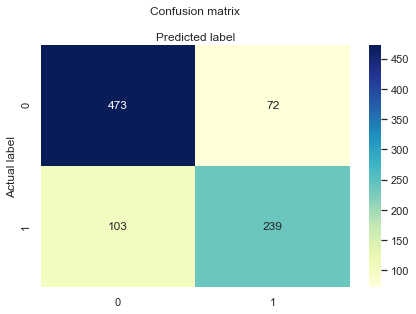

In [61]:
# Plot confusion matrix
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, ax = plt.subplots()

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### F1 Score

In [50]:
# Use confusion metrics to calculate
precison=239/(239+72)
recall=239/(239+103)
f1_score_cal=2*(precison*recall)/(precison+recall)

In [51]:
f1_score_cal

0.7320061255742726

In [58]:
# Use sklearn to get F1 score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
print('Accuracy: {:.2f}'.format(accuracy_score(y['Survived'], predicted)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y['Survived'], predicted)))
print('Precision: {:.2f}'.format(precision_score(y['Survived'], predicted)))
print('Recall: {:.2f}'.format(recall_score(y['Survived'], predicted)))
print('f1_score: {:.2f}'.format(f1_score(y['Survived'], predicted)))

Accuracy: 0.80
Error rate: 0.20
Precision: 0.77
Recall: 0.70
f1_score: 0.73


### ROC/AUC

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


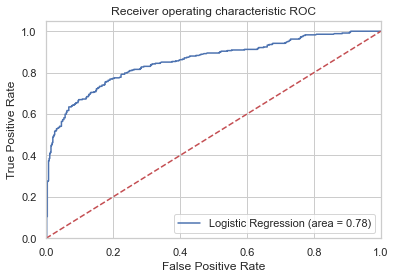

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

In [66]:
logit_roc_auc = roc_auc_score(y['Survived'], predicted)

In [67]:
logit_roc_auc

0.7833601588068029